# Lab Notebook 3

# Load the Data

In [167]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [6]:
text = pd.read_csv("textLogsDepreST-CAT2021.csv")
call = pd.read_csv("callLogsDepreST-CAT2021.csv")
survey = pd.read_csv("surveysDepreST-CAT.csv")

#text.head()

# Subsetting the Dataframe (Text)

In [7]:
text.columns = ['id','UnixTimestamp', 'DirectionText', 'ContactText']
text.head()

,id,UnixTimestamp,DirectionText,ContactText
0,HJERN37PE,1578822661204,1,f48f908ec1db8d3e7f86d516ebdab5213f892b7235c421...
1,HJERN37PE,1578822661793,1,f48f908ec1db8d3e7f86d516ebdab5213f892b7235c421...
2,HJERN37PE,1578822663671,1,f48f908ec1db8d3e7f86d516ebdab5213f892b7235c421...
3,HJERN37PE,1578822694000,2,f48f908ec1db8d3e7f86d516ebdab5213f892b7235c421...
4,HJERN37PE,1578822699411,1,f48f908ec1db8d3e7f86d516ebdab5213f892b7235c421...


In [150]:
text2 = text[text["UnixTimestamp"] > 1590984000000]
text2 = text2.reset_index(drop = True)
#text2.head()

text3 = text2[text2.DirectionText == 2].reset_index()
text4 = text2[text2.DirectionText == 1].reset_index()
text4.head()

,index,id,UnixTimestamp,DirectionText,ContactText
0,0,HJERN37PE,1612368903005,1,dfc2fdc7cdab1991bcd750d4189aa4a6eb92a17e9ad53d...
1,1,HJERN37PE,1592338296909,1,4030d2f7da835717e2db47adbe0c0d60a184d191ed40d0...
2,2,HJERN37PE,1596221421543,1,f72ec490c51635ddbfad2ed7abf59464770324607a753f...
3,3,HJERN37PE,1610829120175,1,9f426194a47f7c9eb5994373c7f8ffc6398ab4f8b449a7...
4,4,HJERN37PE,1609778452471,1,fd790dee51bcfa65e02907f2902e808ef73692e1510c91...


# Converting Unix timestamp (Text)

In [151]:
from datetime import datetime, timedelta
from dateutil import parser

stamps = []

for i in range(0, text3.shape[0]):
    ts = int(text3.UnixTimestamp[i])/1000
    stamps.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d-%H'))
dataTS = pd.to_datetime(stamps, format='%Y-%m-%d-%H', errors='ignore')
text3["timestamp"] = dataTS
text3.head()

,index,id,UnixTimestamp,DirectionText,ContactText,timestamp
0,12,HJERN37PE,1596144295000,2,cd66898282ab9a7638dc8f4c9b38939de0001db9032f41...,2020-07-30 21:00:00
1,17,HJERN37PE,1596144265000,2,62d1aaf4c7acab7307a7baa232ecc64a4fe7da121ce150...,2020-07-30 21:00:00
2,22,HJERN37PE,1596145035000,2,62d1aaf4c7acab7307a7baa232ecc64a4fe7da121ce150...,2020-07-30 21:00:00
3,25,HJERN37PE,1596145802000,2,62d1aaf4c7acab7307a7baa232ecc64a4fe7da121ce150...,2020-07-30 21:00:00
4,28,HJERN37PE,1596147707000,2,62d1aaf4c7acab7307a7baa232ecc64a4fe7da121ce150...,2020-07-30 22:00:00


In [152]:
from datetime import datetime, timedelta
from dateutil import parser

stamps = []
for i in range(0, text4.shape[0]):
    ts = int(text4.UnixTimestamp[i])/1000
    stamps.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d-%H'))
dataTS = pd.to_datetime(stamps, format='%Y-%m-%d-%H', errors='ignore')
text4["timestamp"] = dataTS
text4.head()

,index,id,UnixTimestamp,DirectionText,ContactText,timestamp
0,0,HJERN37PE,1612368903005,1,dfc2fdc7cdab1991bcd750d4189aa4a6eb92a17e9ad53d...,2021-02-03 16:00:00
1,1,HJERN37PE,1592338296909,1,4030d2f7da835717e2db47adbe0c0d60a184d191ed40d0...,2020-06-16 20:00:00
2,2,HJERN37PE,1596221421543,1,f72ec490c51635ddbfad2ed7abf59464770324607a753f...,2020-07-31 18:00:00
3,3,HJERN37PE,1610829120175,1,9f426194a47f7c9eb5994373c7f8ffc6398ab4f8b449a7...,2021-01-16 20:00:00
4,4,HJERN37PE,1609778452471,1,fd790dee51bcfa65e02907f2902e808ef73692e1510c91...,2021-01-04 16:00:00


# Subsetting the Dataframe (Call)

In [11]:
call.columns = ['id', 'DirectionCall','Duration','UnixTimestamp', 'ContactCall']
call.head()

,id,DirectionCall,Duration,UnixTimestamp,ContactCall
0,U0Z6T4BJM,2,79,1548392201284,b245e4e67f7b8f3ed5e03ed76686d3148e82686ca7af1b...
1,U0Z6T4BJM,2,0,1608680699823,b8ae6e78198f68454ebf92afab44caa68dbef52aa920d4...
2,U0Z6T4BJM,2,11,1608190258480,b245e4e67f7b8f3ed5e03ed76686d3148e82686ca7af1b...
3,U0Z6T4BJM,3,0,1608138468492,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...
4,U0Z6T4BJM,3,0,1608137828536,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...


In [127]:
Call2 = call[call["UnixTimestamp"] > 1590984000000]
#Call2.head()

Call3 = Call2[Call2.DirectionCall == 2].reset_index()
Call4 = Call2[Call2.DirectionCall == 1].reset_index()
Call4.head()

,index,id,DirectionCall,Duration,UnixTimestamp,ContactCall
0,7,U0Z6T4BJM,1,20,1607715040917,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...
1,8,U0Z6T4BJM,1,44,1607446192267,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...
2,10,U0Z6T4BJM,1,43,1607114485565,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...
3,12,U0Z6T4BJM,1,96,1607112871465,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...
4,18,U0Z6T4BJM,1,67,1607022164438,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...


# Converting Unix Timestamp (Call)

In [132]:
from datetime import datetime, timedelta
from dateutil import parser

Call3 = Call3.reset_index(drop = True)

stamps = []
for i in range(0, Call3.shape[0]):
    ts = int(Call3.UnixTimestamp[i])/1000
    stamps.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d-%H'))
dataTS = pd.to_datetime(stamps, format='%Y-%m-%d-%H', errors='ignore')
Call3["timestamp"] = dataTS
Call3.head()

,index,id,DirectionCall,Duration,UnixTimestamp,ContactCall,timestamp
0,1,U0Z6T4BJM,2,0,1608680699823,b8ae6e78198f68454ebf92afab44caa68dbef52aa920d4...,2020-12-22 23:00:00
1,2,U0Z6T4BJM,2,11,1608190258480,b245e4e67f7b8f3ed5e03ed76686d3148e82686ca7af1b...,2020-12-17 07:00:00
2,5,U0Z6T4BJM,2,21,1607885464600,b49de99eb5f52758d6b7540abf56580119daf79efddd3b...,2020-12-13 18:00:00
3,11,U0Z6T4BJM,2,4,1607112976084,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-04 20:00:00
4,13,U0Z6T4BJM,2,114,1607102103287,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-04 17:00:00


In [133]:
from datetime import datetime, timedelta
from dateutil import parser

Call4 = Call4.reset_index(drop = True)

stamps = []
for i in range(0, Call4.shape[0]):
    ts = int(Call4.UnixTimestamp[i])/1000
    stamps.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d-%H'))
dataTS = pd.to_datetime(stamps, format='%Y-%m-%d-%H', errors='ignore')
Call4["timestamp"] = dataTS
Call4.head()

,index,id,DirectionCall,Duration,UnixTimestamp,ContactCall,timestamp
0,7,U0Z6T4BJM,1,20,1607715040917,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-11 19:00:00
1,8,U0Z6T4BJM,1,44,1607446192267,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-08 16:00:00
2,10,U0Z6T4BJM,1,43,1607114485565,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-04 20:00:00
3,12,U0Z6T4BJM,1,96,1607112871465,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-04 20:00:00
4,18,U0Z6T4BJM,1,67,1607022164438,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-03 19:00:00


# Creating the Time Series (Call)

In [134]:
month = []
day = []
year = []

for i in range(0, Call3.shape[0]): 
    month.append(Call3["timestamp"][i].month)
    day.append(Call3["timestamp"][i].day)
    year.append(Call3["timestamp"][i].year)
    
Call3["month"] = month
Call3["day"] = day
Call3['year'] = year 

Call3.head(5)

,index,id,DirectionCall,Duration,UnixTimestamp,ContactCall,timestamp,month,day
0,1,U0Z6T4BJM,2,0,1608680699823,b8ae6e78198f68454ebf92afab44caa68dbef52aa920d4...,2020-12-22 23:00:00,12,22
1,2,U0Z6T4BJM,2,11,1608190258480,b245e4e67f7b8f3ed5e03ed76686d3148e82686ca7af1b...,2020-12-17 07:00:00,12,17
2,5,U0Z6T4BJM,2,21,1607885464600,b49de99eb5f52758d6b7540abf56580119daf79efddd3b...,2020-12-13 18:00:00,12,13
3,11,U0Z6T4BJM,2,4,1607112976084,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-04 20:00:00,12,4
4,13,U0Z6T4BJM,2,114,1607102103287,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-04 17:00:00,12,4


In [135]:
month = []
day = []

for i in range(0, Call4.shape[0]): 
    month.append(Call4["timestamp"][i].month)
    day.append(Call4["timestamp"][i].day)

Call4["month"] = month
Call4["day"] = day

Call4.head()

,index,id,DirectionCall,Duration,UnixTimestamp,ContactCall,timestamp,month,day
0,7,U0Z6T4BJM,1,20,1607715040917,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-11 19:00:00,12,11
1,8,U0Z6T4BJM,1,44,1607446192267,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-08 16:00:00,12,8
2,10,U0Z6T4BJM,1,43,1607114485565,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-04 20:00:00,12,4
3,12,U0Z6T4BJM,1,96,1607112871465,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-04 20:00:00,12,4
4,18,U0Z6T4BJM,1,67,1607022164438,688974314d497e26a3fd39f30e0f77efc8134be23e8fa1...,2020-12-03 19:00:00,12,3


In [136]:
ocplist = []
octslist = []
for participant in set(Call3["id"]):
    print(participant)
    parlist = []
    tempdf = Call3[(Call3["id"] == participant) & (Call3["month"])]
    for day in range(0, 31):
        tempdf2 = tempdf[tempdf["day"] == day]
        parlist.append(tempdf2.shape[0])
    octslist.append(parlist)
    ocplist.append(participant)

MBKRUV24O
RO36LNUYG
GOC1D5RNE
7FCE0XFDQ
X9I85TFJH
NYS4MQRPS
0AS1KO35P
IWC8WP86R
VP6XEW1BC
ALJ5BW5DT
C9RIGOBMB
QN1E9GUMV
PHKDFQDNA
8SEHPRKH5
VXP00OA6H
GQ5MST8H5
JX3VZUNU2
NATPFYIWF
SKNKBM56D
ZU480VKLF
37LDX3I9F
S8UM2H1YC
KDIEB7GG9
NQX55024F
L6B3T0HWR
P85P0ARF7
E8Q5JF2AE
ZLVAOMACE
5BPFFMIFV
B8KBO9Y8L
8LOAAXQ52
3CHEWWWZ3
I8FRN56WI
UZ4BBFC02
ZMEDGUHJM
N0LLHMD2F
CI8ZV3SHZ
K8FZTWVGA
VFRO3ZS97
D8SHI576R
F35HPSWQO
CX4BEZ1KH
TJVPZ3KUP
X04Z7QK7S
V8BP0D8P3
3P1RSB01B
ZK5CIEC73
2KBVNGWPL
HRZEHZ7VC
O0PAAK11B
R8XZTT4T8
691P5QTLK
NOUJ4WMBE
ES9H14HA2
E4K175TH3
JTJZR6MPN
CVCXR3FZV
G507LQZ5X
SF0QALS02
IMJJXV1B2
BGL0MMCO9
O7AH5LR0P
R8CI0EGMO
E7EEQIEOV
5C0978TO8
7ILA5Z9BC
QI2RZOIWO
9J0GK5GZ6
72MXGRQBR
NCRV5694O
8WBVV7RX2
GCORDFUNA
SHK92R2HD
N62ILYIU3
6E80QDRBF
GHK1L51LP
WFWNRQUL9
7PAJPUUZ5
5QBSI11JO
6YAWLSYTT
2HP2IU9CX
QBEZBGLGH
L6NKUQPL7
L4TA7N4ED
0EZE7RBCS
K7153X803
PT210DZKV
R7VBKE8O4
5XEUPOVMZ
TZIWD2BHU
FX1QOS4N2
N6KJMVENA
W5X8EEBRW
KIY618IHW
S8H4G4XHO
8GWLHFAJ1
LDBWYKGAM
MXP7VL7UL
BI9UZGZCI
VLUYC1ANM


In [138]:
icplist = []
ictslist = []
for participant in set(Call4["id"]):
    print(participant)
    parlist = []
    tempdf = Call4[(Call4["id"] == participant) & (Call4["month"])] 
    for day in range(0, 31):
        tempdf2 = tempdf[tempdf["day"] == day]
        parlist.append(tempdf2.shape[0])
    ictslist.append(parlist)
    icplist.append(participant)


MBKRUV24O
RO36LNUYG
GOC1D5RNE
7FCE0XFDQ
X9I85TFJH
NYS4MQRPS
0AS1KO35P
IWC8WP86R
VP6XEW1BC
ALJ5BW5DT
C9RIGOBMB
QN1E9GUMV
PHKDFQDNA
8SEHPRKH5
VXP00OA6H
GQ5MST8H5
JX3VZUNU2
NATPFYIWF
SKNKBM56D
ZU480VKLF
37LDX3I9F
KDIEB7GG9
NQX55024F
L6B3T0HWR
P85P0ARF7
E8Q5JF2AE
ZLVAOMACE
5BPFFMIFV
B8KBO9Y8L
8LOAAXQ52
3CHEWWWZ3
I8FRN56WI
UZ4BBFC02
ZMEDGUHJM
N0LLHMD2F
CI8ZV3SHZ
K8FZTWVGA
VFRO3ZS97
D8SHI576R
F35HPSWQO
CX4BEZ1KH
TJVPZ3KUP
X04Z7QK7S
V8BP0D8P3
3P1RSB01B
ZK5CIEC73
2KBVNGWPL
HRZEHZ7VC
O0PAAK11B
R8XZTT4T8
691P5QTLK
NOUJ4WMBE
ES9H14HA2
E4K175TH3
JTJZR6MPN
CVCXR3FZV
G507LQZ5X
SF0QALS02
IMJJXV1B2
BGL0MMCO9
O7AH5LR0P
R8CI0EGMO
E7EEQIEOV
5C0978TO8
7ILA5Z9BC
QI2RZOIWO
9J0GK5GZ6
72MXGRQBR
NCRV5694O
8WBVV7RX2
GCORDFUNA
SHK92R2HD
N62ILYIU3
6E80QDRBF
GHK1L51LP
WFWNRQUL9
7PAJPUUZ5
5QBSI11JO
6YAWLSYTT
2HP2IU9CX
QBEZBGLGH
L6NKUQPL7
L4TA7N4ED
0EZE7RBCS
K7153X803
PT210DZKV
R7VBKE8O4
5XEUPOVMZ
TZIWD2BHU
N6KJMVENA
W5X8EEBRW
KIY618IHW
S8H4G4XHO
8GWLHFAJ1
LDBWYKGAM
MXP7VL7UL
BI9UZGZCI
VLUYC1ANM
G33BXUUS6
0832IIHPX


In [139]:
inCallsts = pd.DataFrame()
inCallsts["id"] = icplist
inCallsts["timeseries"] = ictslist
inCallsts.head(5)

,id,timeseries
0,MBKRUV24O,"[0, 3, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, ..."
1,RO36LNUYG,"[0, 1, 1, 1, 0, 0, 3, 0, 2, 3, 0, 3, 1, 0, 1, ..."
2,GOC1D5RNE,"[0, 4, 3, 7, 8, 0, 2, 6, 1, 5, 3, 8, 16, 7, 8,..."
3,7FCE0XFDQ,"[0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, ..."
4,X9I85TFJH,"[0, 2, 2, 4, 1, 3, 1, 4, 4, 0, 11, 7, 7, 7, 5,..."


In [140]:
outCallts = pd.DataFrame()
outCallts["id"] = ocplist
outCallts["timeseries"] = octslist
outCallts.head(5)

,id,timeseries
0,MBKRUV24O,"[0, 7, 1, 1, 3, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, ..."
1,RO36LNUYG,"[0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, ..."
2,GOC1D5RNE,"[0, 10, 14, 9, 2, 7, 7, 8, 3, 16, 9, 13, 11, 8..."
3,7FCE0XFDQ,"[0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, ..."
4,X9I85TFJH,"[0, 28, 11, 17, 4, 10, 16, 23, 9, 92, 8, 12, 3..."


# Creating Time Series (Text)

In [153]:
month = []
day = []

for i in range(0, text3.shape[0]): 
    month.append(text3["timestamp"][i].month)
    day.append(text3["timestamp"][i].day)

text3["month"] = month
text3["day"] = day

text3.head()

,index,id,UnixTimestamp,DirectionText,ContactText,timestamp,month,day
0,12,HJERN37PE,1596144295000,2,cd66898282ab9a7638dc8f4c9b38939de0001db9032f41...,2020-07-30 21:00:00,7,30
1,17,HJERN37PE,1596144265000,2,62d1aaf4c7acab7307a7baa232ecc64a4fe7da121ce150...,2020-07-30 21:00:00,7,30
2,22,HJERN37PE,1596145035000,2,62d1aaf4c7acab7307a7baa232ecc64a4fe7da121ce150...,2020-07-30 21:00:00,7,30
3,25,HJERN37PE,1596145802000,2,62d1aaf4c7acab7307a7baa232ecc64a4fe7da121ce150...,2020-07-30 21:00:00,7,30
4,28,HJERN37PE,1596147707000,2,62d1aaf4c7acab7307a7baa232ecc64a4fe7da121ce150...,2020-07-30 22:00:00,7,30


In [154]:
month = []
day = []

for i in range(0, text4.shape[0]): 
    month.append(text4["timestamp"][i].month)
    day.append(text4["timestamp"][i].day)

text4["month"] = month
text4["day"] = day

text4.head()

,index,id,UnixTimestamp,DirectionText,ContactText,timestamp,month,day
0,0,HJERN37PE,1612368903005,1,dfc2fdc7cdab1991bcd750d4189aa4a6eb92a17e9ad53d...,2021-02-03 16:00:00,2,3
1,1,HJERN37PE,1592338296909,1,4030d2f7da835717e2db47adbe0c0d60a184d191ed40d0...,2020-06-16 20:00:00,6,16
2,2,HJERN37PE,1596221421543,1,f72ec490c51635ddbfad2ed7abf59464770324607a753f...,2020-07-31 18:00:00,7,31
3,3,HJERN37PE,1610829120175,1,9f426194a47f7c9eb5994373c7f8ffc6398ab4f8b449a7...,2021-01-16 20:00:00,1,16
4,4,HJERN37PE,1609778452471,1,fd790dee51bcfa65e02907f2902e808ef73692e1510c91...,2021-01-04 16:00:00,1,4


In [155]:
otplist = []
ottslist = []
for participant in set(text3["id"]):
    print(participant)
    parlist = []
    tempdf = text3[(text3["id"] == participant) & (text3["month"])]
    for day in range(0, 31):
        tempdf2 = tempdf[tempdf["day"] == day]
        parlist.append(tempdf2.shape[0])
    ottslist.append(parlist)
    otplist.append(participant)

0XRDYXWOE
9J0GK5GZ6
1ZPER3JLY
YS0ZSCTRI
3NL2J473W
66VHJOQM5
RO36LNUYG
NCRV5694O
EO3URI0FA
A1WWOV7A7
OVW13SMGC
0AS1KO35P
XT11CP7OL
CEGGDZ4BQ
FH62WPZP3
VP6XEW1BC
4IGB4DKMP
6E80QDRBF
GHK1L51LP
ZS3XUU0WD
M153ZUCWD
NVTUV071H
RBA8L53F1
RV8D4SZZS
D23O0X363
QBEZBGLGH
LO013DVYO
ICONATXLW
RZAHRWD67
0EZE7RBCS
ROSJJNIB3
8SEHPRKH5
QU4II7Z75
VXP00OA6H
JX3VZUNU2
5XEUPOVMZ
TZIWD2BHU
SKNKBM56D
I2QVYX8KA
ZNQ5Z1Q9I
EBCDMC7R8
KIY618IHW
S8H4G4XHO
VLUYC1ANM
BI9UZGZCI
1FI0MTC50
37LDX3I9F
S8UM2H1YC
9UK1BSBLV
0NZH3ULXB
G33BXUUS6
RRDR93OAQ
EHKQK9NGT
I9K3V4DAH
2HXBM74IR
C06F1T857
BN0LIX16A
P85P0ARF7
RWDISU11F
ZLVAOMACE
OAHHVQH1J
C4NCER7RE
NDBMQY06C
J6UOKFUR1
64XV6EVX5
AP4FPZP5H
BATBGXLRZ
G2OLGEXS9
60RW5873T
5VKBPOJA5
GRYTK1JPH
UZ4BBFC02
DC99V3UUB
8E9UTS241
H9OW9LNOC
QB41U9B20
3PIMCAZX9
PUB9J1B82
MUGAV0MIC
P69VZJY2D
EAIY2O2TU
22LL6OVMX
K8FZTWVGA
PLV535I3A
Y2D3VEDCB
Q6N7PT68V
J79E017DW
GDI7L5YNQ
CDH2QS5RN
24GRUOP7U
FANIYNL6M
ZW34HBGVK
Q75ZPBZRV
NDG31PVFT
33WM31B9D
00WRNS3MK
1MZ0A5PA6
LW0PT99GB
HJERN37PE
EI9BLEJO5


In [1]:
itplist = []
ittslist = []
for participant in set(text4["id"]):
    print(participant)
    parlist = []
    tempdf = text4[(text4["id"] == participant) & (text4["month"])]
    for day in range(0, 31):
        tempdf2 = tempdf[tempdf["day"] == day]
        parlist.append(tempdf2.shape[0])
    ittslist.append(parlist)
    itplist.append(participant)

NameError: name 'text4' is not defined

In [168]:
outTextts = pd.DataFrame()
outTextts["id"] = otplist
outTextts["timeseries"] = ottslist
outTextts.head()

,id,timeseries
0,0XRDYXWOE,"[0, 0, 0, 0, 0, 8, 2, 2, 0, 0, 0, 0, 0, 0, 0, ..."
1,9J0GK5GZ6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 5, 5, ..."
2,1ZPER3JLY,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,YS0ZSCTRI,"[0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, ..."
4,3NL2J473W,"[0, 8, 17, 11, 2, 2, 2, 0, 0, 10, 0, 0, 7, 0, ..."


In [158]:
inTextts = pd.DataFrame()
inTextts["id"] = itplist
inTextts["timeseries"] = ittslist
inTextts.head(5)

,id,timeseries
0,MBKRUV24O,"[0, 9, 9, 0, 0, 0, 0, 1, 0, 1, 0, 0, 8, 8, 1, ..."
1,RO36LNUYG,"[0, 2, 1, 4, 8, 7, 11, 4, 4, 4, 10, 6, 5, 9, 3..."
2,3L5SXMBCT,"[0, 27, 40, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,GOC1D5RNE,"[0, 42, 16, 58, 21, 4, 2, 1, 2, 19, 9, 19, 10,..."
4,NYS4MQRPS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Graph

In [171]:
intexts = inTextts["timeseries"][1]
outtexts = outTextts["timeseries"][6]

In [172]:
xaxis = list(range(0, len(intexts)))

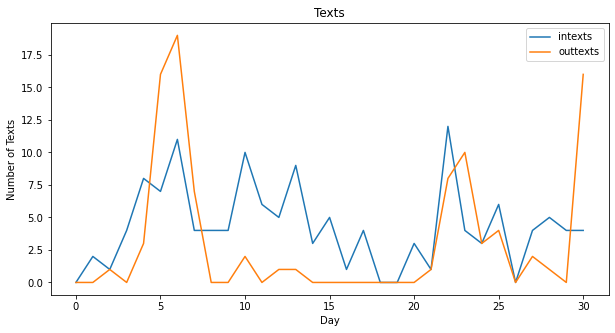

In [173]:
plt.figure(figsize = (10,5))
plt.plot(xaxis, intexts, label = "intexts")
plt.plot(xaxis, outtexts, label = "outtexts")
plt.title("Texts")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Number of Texts")
plt.show()

# Extracting Features

In [159]:
!pip install tsfel

In [160]:
import tsfel
import numpy as np

variable = "timeseries"
var = []
for v in range(0, inCallsts.shape[0]):
    var.append(inCallsts[variable][v]) #[:i]

inCallsts[variable] = var
inCallsts2 = inCallsts[variable]

cfg = tsfel.get_features_by_domain()
inCallstsDF = tsfel.time_series_features_extractor(cfg, inCallsts2)

*** Feature extraction started ***


C:\Users\student\AppData\Local\Temp\ipykernel_25464\3384866583.py:13: UserWarning:

Using default sampling frequency set in configuration file.



C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 


*** Feature extraction finished ***


In [161]:
import tsfel
import numpy as np

variable = "timeseries"
var = []
for v in range(0, outCallts.shape[0]):
    var.append(outCallts[variable][v]) #[:i]

outCallts[variable] = var
outCallts2 = textts[variable]

cfg = tsfel.get_features_by_domain()
outCalltsDF = tsfel.time_series_features_extractor(cfg, outCallts2)

*** Feature extraction started ***


C:\Users\student\AppData\Local\Temp\ipykernel_25464\297403066.py:13: UserWarning:

Using default sampling frequency set in configuration file.



C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 


*** Feature extraction finished ***


In [162]:
import tsfel
import numpy as np

variable = "timeseries"
var = []
for v in range(0, outTextts.shape[0]):
    var.append(outTextts[variable][v]) #[:i]

outTextts[variable] = var
outTextts2 = outTextts[variable]

cfg = tsfel.get_features_by_domain()
outTexttsDF = tsfel.time_series_features_extractor(cfg, outTextts2)

*** Feature extraction started ***


C:\Users\student\AppData\Local\Temp\ipykernel_25464\440476604.py:13: UserWarning:

Using default sampling frequency set in configuration file.



C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 


*** Feature extraction finished ***


In [163]:
import tsfel
import numpy as np

variable = "timeseries"
var = []
for v in range(0, inTextts.shape[0]):
    var.append(inTextts[variable][v]) #[:i]

inTextts[variable] = var
inTextts2 = textts[variable]

cfg = tsfel.get_features_by_domain()
inTexttsDF = tsfel.time_series_features_extractor(cfg, inTextts2)

*** Feature extraction started ***


C:\Users\student\AppData\Local\Temp\ipykernel_25464\1242994138.py:13: UserWarning:

Using default sampling frequency set in configuration file.



C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\student\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: 


*** Feature extraction finished ***


In [164]:
inTexttsDF.head(5)

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,0_ECDF_4,0_ECDF_5,0_ECDF_6,0_ECDF_7,0_ECDF_8,0_ECDF_9,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,0_Fundamental frequency,0_Histogram_0,0_Histogram_1,0_Histogram_2,0_Histogram_3,0_Histogram_4,0_Histogram_5,0_Histogram_6,0_Histogram_7,0_Histogram_8,0_Histogram_9,0_Human range energy,0_Interquartile range,0_Kurtosis,0_LPCC_0,0_LPCC_1,0_LPCC_10,0_LPCC_11,0_LPCC_12,0_LPCC_2,0_LPCC_3,0_LPCC_4,0_LPCC_5,0_LPCC_6,0_LPCC_7,0_LPCC_8,0_LPCC_9,0_MFCC_0,0_MFCC_1,0_MFCC_10,0_MFCC_11,0_MFCC_2,0_MFCC_3,0_MFCC_4,0_MFCC_5,0_MFCC_6,0_MFCC_7,0_MFCC_8,0_MFCC_9,0_Max,0_Max power spectrum,0_Maximum frequency,0_Mean,0_Mean absolute deviation,0_Mean absolute diff,0_Mean diff,0_Median,0_Median absolute deviation,0_Median absolute diff,0_Median diff,0_Median frequency,0_Min,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Power bandwidth,0_Root mean square,0_Signal distance,0_Skewness,0_Slope,0_Spectral centroid,0_Spectral decrease,0_Spectral distance,0_Spectral entropy,0_Spectral kurtosis,0_Spectral positive turning points,0_Spectral roll-off,0_Spectral roll-on,0_Spectral skewness,0_Spectral slope,0_Spectral spread,0_Spectral variation,0_Standard deviation,0_Sum absolute diff,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet absolute mean_1,0_Wavelet absolute mean_2,0_Wavelet absolute mean_3,0_Wavelet absolute mean_4,0_Wavelet absolute mean_5,0_Wavelet absolute mean_6,0_Wavelet absolute mean_7,0_Wavelet absolute mean_8,0_Wavelet energy_0,0_Wavelet energy_1,0_Wavelet energy_2,0_Wavelet energy_3,0_Wavelet energy_4,0_Wavelet energy_5,0_Wavelet energy_6,0_Wavelet energy_7,0_Wavelet energy_8,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet standard deviation_1,0_Wavelet standard deviation_2,0_Wavelet standard deviation_3,0_Wavelet standard deviation_4,0_Wavelet standard deviation_5,0_Wavelet standard deviation_6,0_Wavelet standard deviation_7,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,1147.0,1.14,1147.0,0.191569,6.0,24.0,0.0,8.0,0.032258,0.064516,0.096774,0.129032,0.16129,0.193548,0.225806,0.258065,0.290323,0.322581,0.579833,0.000605,2.008735,0.780005,1.070768,0.176335,0.075910,0.107712,0.087451,0.795789,0.753845,0.094589,0.793948,0.067403,0.130295,0.521031,0.264631,3.571429,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,4.0,0.546592,7.5,2.978884,0.122032,0.720338,0.455706,0.348603,0.720338,0.348603,0.455706,0.038433,0.071879,0.101222,0.101222,0.071879,0.038433,-36.253122,-45.218570,324.168590,230.405328,81.901346,-81.907398,11.698874,69.053892,-62.020831,-15.883072,-72.243154,78.646163,21.0,0.049437,46.428571,3.709677,3.837669,3.733333,0.066667,1.0,1.0,1.0,0.0,14.285714,0.0,3.0,0.0,21.0,6.0,35.483871,6.082763,126.609272,1.657264,0.154032,17.556813,-0.769689,-1198.680999,0.823262,1.801967,5.0,46.428571,0.0,0.462677,-0.002084,16.137652,0.199015,4.820611,112.0,3823.333333,23.238293,0.139640,0.763550,1.504154,2.080085,2.919650,4.045014,5.418736,6.850568,8.177715,4.468957,5.412399,6.915038,7.217318,7.484415,8.098573,8.796614,9.517850,10.247118,2.169319,4.466775,5.358270,6.749464,6.911073,6.891452,7.016035,6.929482,6.607509,6.174819,19.952082,28.711055,45.555268,47.762929,47.492112,49.224743,48.017717,43.659178,38.128391,11.0
1,3327.0,2.19,3327

# Merging Dataframes 

In [187]:
inCallstsDF['id'] = inCallsts['id']
outCalltsDF['id'] = outCallts['id']
outTexttsDF['id'] = outTextts['id']
inTexttsDF['id'] = inTextts['id']
inCallstsDF.head()

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,0_ECDF_4,0_ECDF_5,0_ECDF_6,0_ECDF_7,0_ECDF_8,0_ECDF_9,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,0_Fundamental frequency,0_Histogram_0,0_Histogram_1,0_Histogram_2,0_Histogram_3,0_Histogram_4,0_Histogram_5,0_Histogram_6,0_Histogram_7,0_Histogram_8,0_Histogram_9,0_Human range energy,0_Interquartile range,0_Kurtosis,0_LPCC_0,0_LPCC_1,0_LPCC_10,0_LPCC_11,0_LPCC_12,0_LPCC_2,0_LPCC_3,0_LPCC_4,0_LPCC_5,0_LPCC_6,0_LPCC_7,0_LPCC_8,0_LPCC_9,0_MFCC_0,0_MFCC_1,0_MFCC_10,0_MFCC_11,0_MFCC_2,0_MFCC_3,0_MFCC_4,0_MFCC_5,0_MFCC_6,0_MFCC_7,0_MFCC_8,0_MFCC_9,0_Max,0_Max power spectrum,0_Maximum frequency,0_Mean,0_Mean absolute deviation,0_Mean absolute diff,0_Mean diff,0_Median,0_Median absolute deviation,0_Median absolute diff,0_Median diff,0_Median frequency,0_Min,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Power bandwidth,0_Root mean square,0_Signal distance,0_Skewness,0_Slope,0_Spectral centroid,0_Spectral decrease,0_Spectral distance,0_Spectral entropy,0_Spectral kurtosis,0_Spectral positive turning points,0_Spectral roll-off,0_Spectral roll-on,0_Spectral skewness,0_Spectral slope,0_Spectral spread,0_Spectral variation,0_Standard deviation,0_Sum absolute diff,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet absolute mean_1,0_Wavelet absolute mean_2,0_Wavelet absolute mean_3,0_Wavelet absolute mean_4,0_Wavelet absolute mean_5,0_Wavelet absolute mean_6,0_Wavelet absolute mean_7,0_Wavelet absolute mean_8,0_Wavelet energy_0,0_Wavelet energy_1,0_Wavelet energy_2,0_Wavelet energy_3,0_Wavelet energy_4,0_Wavelet energy_5,0_Wavelet energy_6,0_Wavelet energy_7,0_Wavelet energy_8,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet standard deviation_1,0_Wavelet standard deviation_2,0_Wavelet standard deviation_3,0_Wavelet standard deviation_4,0_Wavelet standard deviation_5,0_Wavelet standard deviation_6,0_Wavelet standard deviation_7,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate,id
0,34.0,0.17,34.0,0.082353,6.0,24.0,0.0,1.0,0.032258,0.064516,0.096774,0.129032,0.16129,0.193548,0.225806,0.258065,0.290323,0.322581,0.285989,0.000245,0.057882,0.004231,0.003460,0.010484,0.004765,0.016727,0.003119,0.030812,0.011068,0.007027,0.012110,0.001250,0.003255,0.000785,0.000695,3.571429,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,5.0,0.486197,1.0,0.185457,0.065943,0.240196,0.376343,0.490004,0.240196,0.490004,0.376343,0.269648,0.132704,0.132433,0.132433,0.132704,0.269648,-51.317150,42.289179,-19.295032,93.821287,35.251511,75.604922,71.882629,-74.354258,9.962663,-13.318324,76.538253,-17.856210,3.0,0.032956,50.000000,0.580645,0.749220,0.733333,0.066667,0.0,0.0,0.5,0.0,10.714286,0.0,4.0,0.0,3.0,6.0,48.387097,1.047270,42.174895,1.213780,-0.037097,19.606203,-0.720650,-147.129912,0.711367,1.523475,2.0,50.000000,0.0,0.453754,-0.001510,19.266792,0.096394,0.871565,22.0,113.333333,0.759625,0.022252,0.125560,0.244605,0.370281,0.467973,0.605756,0.785768,0.981272,1.166992,0.585973,0.734361,1.150328,1.366878,1.473064,1.554206,1.612896,1.658749,1.704640,2.153242,0.585550,0.723547,1.124021,1.315768,1.396753,1.431298,1.408546,1.337368,1.242548,0.342869,0.523521,1.263423,1.731247,1.950919,2.048614,1.984003,1.788553,1.543926,15.0,MBKRUV24O
1,46.0,0.24,46.0,0.115435,0.0

In [182]:
#Columns that end in x are features of the text data
callTextF = pd.merge(inCallstsDF,outCalltsDF, on='id', how='outer')
callTextF.head()
#X = Incoming Calls
#Y = Outgoing Calls

,0_Absolute energy_x,0_Area under the curve_x,0_Autocorrelation_x,0_Centroid_x,0_ECDF Percentile Count_0_x,0_ECDF Percentile Count_1_x,0_ECDF Percentile_0_x,0_ECDF Percentile_1_x,0_ECDF_0_x,0_ECDF_1_x,0_ECDF_2_x,0_ECDF_3_x,0_ECDF_4_x,0_ECDF_5_x,0_ECDF_6_x,0_ECDF_7_x,0_ECDF_8_x,0_ECDF_9_x,0_Entropy_x,0_FFT mean coefficient_0_x,0_FFT mean coefficient_1_x,0_FFT mean coefficient_10_x,0_FFT mean coefficient_11_x,0_FFT mean coefficient_12_x,0_FFT mean coefficient_13_x,0_FFT mean coefficient_14_x,0_FFT mean coefficient_15_x,0_FFT mean coefficient_2_x,0_FFT mean coefficient_3_x,0_FFT mean coefficient_4_x,0_FFT mean coefficient_5_x,0_FFT mean coefficient_6_x,0_FFT mean coefficient_7_x,0_FFT mean coefficient_8_x,0_FFT mean coefficient_9_x,0_Fundamental frequency_x,0_Histogram_0_x,0_Histogram_1_x,0_Histogram_2_x,0_Histogram_3_x,0_Histogram_4_x,0_Histogram_5_x,0_Histogram_6_x,0_Histogram_7_x,0_Histogram_8_x,0_Histogram_9_x,0_Human range energy_x,0_Interquartile range_x,0_Kurtosis_x,0_LPCC_0_x,0_LPCC_1_x,0_LPCC_10_x,0_LPCC_11_x,0_LPCC_12_x,0_LPCC_2_x,0_LPCC_3_x,0_LPCC_4_x,0_LPCC_5_x,0_LPCC_6_x,0_LPCC_7_x,0_LPCC_8_x,0_LPCC_9_x,0_MFCC_0_x,0_MFCC_1_x,0_MFCC_10_x,0_MFCC_11_x,0_MFCC_2_x,0_MFCC_3_x,0_MFCC_4_x,0_MFCC_5_x,0_MFCC_6_x,0_MFCC_7_x,0_MFCC_8_x,0_MFCC_9_x,0_Max_x,0_Max power spectrum_x,0_Maximum frequency_x,0_Mean_x,0_Mean absolute deviation_x,0_Mean absolute diff_x,0_Mean diff_x,0_Median_x,0_Median absolute deviation_x,0_Median absolute diff_x,0_Median diff_x,0_Median frequency_x,0_Min_x,0_Negative turning points_x,0_Neighbourhood peaks_x,0_Peak to peak distance_x,0_Positive turning points_x,0_Power bandwidth_x,0_Root mean square_x,0_Signal distance_x,0_Skewness_x,0_Slope_x,0_Spectral centroid_x,0_Spectral decrease_x,0_Spectral distance_x,0_Spectral entropy_x,0_Spectral kurtosis_x,0_Spectral positive turning points_x,0_Spectral roll-off_x,0_Spectral roll-on_x,0_Spectral skewness_x,0_Spectral slope_x,0_Spectral spread_x,0_Spectral variation_x,0_Standard deviation_x,0_Sum absolute diff_x,0_Total energy_x,0_Variance_x,0_Wavelet absolute mean_0_x,0_Wavelet absolute mean_1_x,0_Wavelet absolute mean_2_x,0_Wavelet absolute mean_3_x,0_Wavelet absolute mean_4_x,0_Wavelet absolute mean_5_x,0_Wavelet absolute mean_6_x,0_Wavelet absolute mean_7_x,0_Wavelet absolute mean_8_x,0_Wavelet energy_0_x,0_Wavelet energy_1_x,0_Wavelet energy_2_x,0_Wavelet energy_3_x,0_Wavelet energy_4_x,0_Wavelet energy_5_x,0_Wavelet energy_6_x,0_Wavelet energy_7_x,0_Wavelet energy_8_x,0_Wavelet entropy_x,0_Wavelet standard deviation_0_x,0_Wavelet standard deviation_1_x,0_Wavelet standard deviation_2_x,0_Wavelet standard deviation_3_x,0_Wavelet standard deviation_4_x,0_Wavelet standard deviation_5_x,0_Wavelet standard deviation_6_x,0_Wavelet standard deviation_7_x,0_Wavelet standard deviation_8_x,0_Wavelet variance_0_x,0_Wavelet variance_1_x,0_Wavelet variance_2_x,0_Wavelet variance_3_x,0_Wavelet variance_4_x,0_Wavelet variance_5_x,0_Wavelet variance_6_x,0_Wavelet variance_7_x,0_Wavelet variance_8_x,0_Zero crossing rate_x,id,0_Absolute energy_y,0_Area under the curve_y,0_Autocorrelation_y,0_Centroid_y,0_ECDF Percentile Count_0_y,0_ECDF Percentile Count_1_y,0_ECDF Percentile_0_y,0_ECDF Percentile_1_y,0_ECDF_0_y,0_ECDF_1_y,0_ECDF_2_y,0_ECDF_3_y,0_ECDF_4_y,0_ECDF_5_y,0_ECDF_6_y,0_ECDF_7_y,0_ECDF_8_y,0_ECDF_9_y,0_Entropy_y,0_FFT mean coefficient_0_y,0_FFT mean coefficient_1_y,0_FFT mean coefficient_10_y,0_FFT mean coefficient_11_y,0_FFT mean coefficient_12_y,0_FFT mean coefficient_13_y,0_FFT mean coefficient_14_y,0_FFT mean coefficient_15_y,0_FFT mean coefficient_2_y,0_FFT mean coefficient_3_y,0_FFT mean coefficient_4_y,0_FFT mean coefficient_5_y,0_FFT mean coefficient_6_y,0_FFT mean coefficient_7_y,0_FFT mean coefficient_8_y,0_FFT mean coefficient_9_y,0_Fundamental frequency_y,0_Histogram_0_y,0_Histogram_1_y,0_Histogram_2_y,0_Histogram_3_y,0_Histogram_4_y,0_Histogram_5_y,0_Histogram_6_y,0_Histogram_7_y,0_Histogram_8_y,0_Histogram_9_y,0_Human range energy_y,0_Interquartile range

In [183]:
callTextF2 = pd.merge(outTexttsDF,inTexttsDF, on='id', how='outer')
callTextF2.head()
#X = Outgoing Texts
#Y = Incoming Texts

,0_Absolute energy_x,0_Area under the curve_x,0_Autocorrelation_x,0_Centroid_x,0_ECDF Percentile Count_0_x,0_ECDF Percentile Count_1_x,0_ECDF Percentile_0_x,0_ECDF Percentile_1_x,0_ECDF_0_x,0_ECDF_1_x,0_ECDF_2_x,0_ECDF_3_x,0_ECDF_4_x,0_ECDF_5_x,0_ECDF_6_x,0_ECDF_7_x,0_ECDF_8_x,0_ECDF_9_x,0_Entropy_x,0_FFT mean coefficient_0_x,0_FFT mean coefficient_1_x,0_FFT mean coefficient_10_x,0_FFT mean coefficient_11_x,0_FFT mean coefficient_12_x,0_FFT mean coefficient_13_x,0_FFT mean coefficient_14_x,0_FFT mean coefficient_15_x,0_FFT mean coefficient_2_x,0_FFT mean coefficient_3_x,0_FFT mean coefficient_4_x,0_FFT mean coefficient_5_x,0_FFT mean coefficient_6_x,0_FFT mean coefficient_7_x,0_FFT mean coefficient_8_x,0_FFT mean coefficient_9_x,0_Fundamental frequency_x,0_Histogram_0_x,0_Histogram_1_x,0_Histogram_2_x,0_Histogram_3_x,0_Histogram_4_x,0_Histogram_5_x,0_Histogram_6_x,0_Histogram_7_x,0_Histogram_8_x,0_Histogram_9_x,0_Human range energy_x,0_Interquartile range_x,0_Kurtosis_x,0_LPCC_0_x,0_LPCC_1_x,0_LPCC_10_x,0_LPCC_11_x,0_LPCC_12_x,0_LPCC_2_x,0_LPCC_3_x,0_LPCC_4_x,0_LPCC_5_x,0_LPCC_6_x,0_LPCC_7_x,0_LPCC_8_x,0_LPCC_9_x,0_MFCC_0_x,0_MFCC_1_x,0_MFCC_10_x,0_MFCC_11_x,0_MFCC_2_x,0_MFCC_3_x,0_MFCC_4_x,0_MFCC_5_x,0_MFCC_6_x,0_MFCC_7_x,0_MFCC_8_x,0_MFCC_9_x,0_Max_x,0_Max power spectrum_x,0_Maximum frequency_x,0_Mean_x,0_Mean absolute deviation_x,0_Mean absolute diff_x,0_Mean diff_x,0_Median_x,0_Median absolute deviation_x,0_Median absolute diff_x,0_Median diff_x,0_Median frequency_x,0_Min_x,0_Negative turning points_x,0_Neighbourhood peaks_x,0_Peak to peak distance_x,0_Positive turning points_x,0_Power bandwidth_x,0_Root mean square_x,0_Signal distance_x,0_Skewness_x,0_Slope_x,0_Spectral centroid_x,0_Spectral decrease_x,0_Spectral distance_x,0_Spectral entropy_x,0_Spectral kurtosis_x,0_Spectral positive turning points_x,0_Spectral roll-off_x,0_Spectral roll-on_x,0_Spectral skewness_x,0_Spectral slope_x,0_Spectral spread_x,0_Spectral variation_x,0_Standard deviation_x,0_Sum absolute diff_x,0_Total energy_x,0_Variance_x,0_Wavelet absolute mean_0_x,0_Wavelet absolute mean_1_x,0_Wavelet absolute mean_2_x,0_Wavelet absolute mean_3_x,0_Wavelet absolute mean_4_x,0_Wavelet absolute mean_5_x,0_Wavelet absolute mean_6_x,0_Wavelet absolute mean_7_x,0_Wavelet absolute mean_8_x,0_Wavelet energy_0_x,0_Wavelet energy_1_x,0_Wavelet energy_2_x,0_Wavelet energy_3_x,0_Wavelet energy_4_x,0_Wavelet energy_5_x,0_Wavelet energy_6_x,0_Wavelet energy_7_x,0_Wavelet energy_8_x,0_Wavelet entropy_x,0_Wavelet standard deviation_0_x,0_Wavelet standard deviation_1_x,0_Wavelet standard deviation_2_x,0_Wavelet standard deviation_3_x,0_Wavelet standard deviation_4_x,0_Wavelet standard deviation_5_x,0_Wavelet standard deviation_6_x,0_Wavelet standard deviation_7_x,0_Wavelet standard deviation_8_x,0_Wavelet variance_0_x,0_Wavelet variance_1_x,0_Wavelet variance_2_x,0_Wavelet variance_3_x,0_Wavelet variance_4_x,0_Wavelet variance_5_x,0_Wavelet variance_6_x,0_Wavelet variance_7_x,0_Wavelet variance_8_x,0_Zero crossing rate_x,id,0_Absolute energy_y,0_Area under the curve_y,0_Autocorrelation_y,0_Centroid_y,0_ECDF Percentile Count_0_y,0_ECDF Percentile Count_1_y,0_ECDF Percentile_0_y,0_ECDF Percentile_1_y,0_ECDF_0_y,0_ECDF_1_y,0_ECDF_2_y,0_ECDF_3_y,0_ECDF_4_y,0_ECDF_5_y,0_ECDF_6_y,0_ECDF_7_y,0_ECDF_8_y,0_ECDF_9_y,0_Entropy_y,0_FFT mean coefficient_0_y,0_FFT mean coefficient_1_y,0_FFT mean coefficient_10_y,0_FFT mean coefficient_11_y,0_FFT mean coefficient_12_y,0_FFT mean coefficient_13_y,0_FFT mean coefficient_14_y,0_FFT mean coefficient_15_y,0_FFT mean coefficient_2_y,0_FFT mean coefficient_3_y,0_FFT mean coefficient_4_y,0_FFT mean coefficient_5_y,0_FFT mean coefficient_6_y,0_FFT mean coefficient_7_y,0_FFT mean coefficient_8_y,0_FFT mean coefficient_9_y,0_Fundamental frequency_y,0_Histogram_0_y,0_Histogram_1_y,0_Histogram_2_y,0_Histogram_3_y,0_Histogram_4_y,0_Histogram_5_y,0_Histogram_6_y,0_Histogram_7_y,0_Histogram_8_y,0_Histogram_9_y,0_Human range energy_y,0_Interquartile range

In [190]:
calltextft = pd.merge(callTextF, callTextF2, on='id', how='outer')
calltextft.head()

,0_Absolute energy_x_x,0_Area under the curve_x_x,0_Autocorrelation_x_x,0_Centroid_x_x,0_ECDF Percentile Count_0_x_x,0_ECDF Percentile Count_1_x_x,0_ECDF Percentile_0_x_x,0_ECDF Percentile_1_x_x,0_ECDF_0_x_x,0_ECDF_1_x_x,0_ECDF_2_x_x,0_ECDF_3_x_x,0_ECDF_4_x_x,0_ECDF_5_x_x,0_ECDF_6_x_x,0_ECDF_7_x_x,0_ECDF_8_x_x,0_ECDF_9_x_x,0_Entropy_x_x,0_FFT mean coefficient_0_x_x,0_FFT mean coefficient_1_x_x,0_FFT mean coefficient_10_x_x,0_FFT mean coefficient_11_x_x,0_FFT mean coefficient_12_x_x,0_FFT mean coefficient_13_x_x,0_FFT mean coefficient_14_x_x,0_FFT mean coefficient_15_x_x,0_FFT mean coefficient_2_x_x,0_FFT mean coefficient_3_x_x,0_FFT mean coefficient_4_x_x,0_FFT mean coefficient_5_x_x,0_FFT mean coefficient_6_x_x,0_FFT mean coefficient_7_x_x,0_FFT mean coefficient_8_x_x,0_FFT mean coefficient_9_x_x,0_Fundamental frequency_x_x,0_Histogram_0_x_x,0_Histogram_1_x_x,0_Histogram_2_x_x,0_Histogram_3_x_x,0_Histogram_4_x_x,0_Histogram_5_x_x,0_Histogram_6_x_x,0_Histogram_7_x_x,0_Histogram_8_x_x,0_Histogram_9_x_x,0_Human range energy_x_x,0_Interquartile range_x_x,0_Kurtosis_x_x,0_LPCC_0_x_x,0_LPCC_1_x_x,0_LPCC_10_x_x,0_LPCC_11_x_x,0_LPCC_12_x_x,0_LPCC_2_x_x,0_LPCC_3_x_x,0_LPCC_4_x_x,0_LPCC_5_x_x,0_LPCC_6_x_x,0_LPCC_7_x_x,0_LPCC_8_x_x,0_LPCC_9_x_x,0_MFCC_0_x_x,0_MFCC_1_x_x,0_MFCC_10_x_x,0_MFCC_11_x_x,0_MFCC_2_x_x,0_MFCC_3_x_x,0_MFCC_4_x_x,0_MFCC_5_x_x,0_MFCC_6_x_x,0_MFCC_7_x_x,0_MFCC_8_x_x,0_MFCC_9_x_x,0_Max_x_x,0_Max power spectrum_x_x,0_Maximum frequency_x_x,0_Mean_x_x,0_Mean absolute deviation_x_x,0_Mean absolute diff_x_x,0_Mean diff_x_x,0_Median_x_x,0_Median absolute deviation_x_x,0_Median absolute diff_x_x,0_Median diff_x_x,0_Median frequency_x_x,0_Min_x_x,0_Negative turning points_x_x,0_Neighbourhood peaks_x_x,0_Peak to peak distance_x_x,0_Positive turning points_x_x,0_Power bandwidth_x_x,0_Root mean square_x_x,0_Signal distance_x_x,0_Skewness_x_x,0_Slope_x_x,0_Spectral centroid_x_x,0_Spectral decrease_x_x,0_Spectral distance_x_x,0_Spectral entropy_x_x,0_Spectral kurtosis_x_x,0_Spectral positive turning points_x_x,0_Spectral roll-off_x_x,0_Spectral roll-on_x_x,0_Spectral skewness_x_x,0_Spectral slope_x_x,0_Spectral spread_x_x,0_Spectral variation_x_x,0_Standard deviation_x_x,0_Sum absolute diff_x_x,0_Total energy_x_x,0_Variance_x_x,0_Wavelet absolute mean_0_x_x,0_Wavelet absolute mean_1_x_x,0_Wavelet absolute mean_2_x_x,0_Wavelet absolute mean_3_x_x,0_Wavelet absolute mean_4_x_x,0_Wavelet absolute mean_5_x_x,0_Wavelet absolute mean_6_x_x,0_Wavelet absolute mean_7_x_x,0_Wavelet absolute mean_8_x_x,0_Wavelet energy_0_x_x,0_Wavelet energy_1_x_x,0_Wavelet energy_2_x_x,0_Wavelet energy_3_x_x,0_Wavelet energy_4_x_x,0_Wavelet energy_5_x_x,0_Wavelet energy_6_x_x,0_Wavelet energy_7_x_x,0_Wavelet energy_8_x_x,0_Wavelet entropy_x_x,0_Wavelet standard deviation_0_x_x,0_Wavelet standard deviation_1_x_x,0_Wavelet standard deviation_2_x_x,0_Wavelet standard deviation_3_x_x,0_Wavelet standard deviation_4_x_x,0_Wavelet standard deviation_5_x_x,0_Wavelet standard deviation_6_x_x,0_Wavelet standard deviation_7_x_x,0_Wavelet standard deviation_8_x_x,0_Wavelet variance_0_x_x,0_Wavelet variance_1_x_x,0_Wavelet variance_2_x_x,0_Wavelet variance_3_x_x,0_Wavelet variance_4_x_x,0_Wavelet variance_5_x_x,0_Wavelet variance_6_x_x,0_Wavelet variance_7_x_x,0_Wavelet variance_8_x_x,0_Zero crossing rate_x_x,id,0_Absolute energy_y_x,0_Area under the curve_y_x,0_Autocorrelation_y_x,0_Centroid_y_x,0_ECDF Percentile Count_0_y_x,0_ECDF Percentile Count_1_y_x,0_ECDF Percentile_0_y_x,0_ECDF Percentile_1_y_x,0_ECDF_0_y_x,0_ECDF_1_y_x,0_ECDF_2_y_x,0_ECDF_3_y_x,0_ECDF_4_y_x,0_ECDF_5_y_x,0_ECDF_6_y_x,0_ECDF_7_y_x,0_ECDF_8_y_x,0_ECDF_9_y_x,0_Entropy_y_x,0_FFT mean coefficient_0_y_x,0_FFT mean coefficient_1_y_x,0_FFT mean coefficient_10_y_x,0_FFT mean coefficient_11_y_x,0_FFT mean coefficient_12_y_x,0_FFT mean coefficient_13_y_x,0_FFT mean coefficient_14_y_x,0_FFT mean coefficient_15_y_x,0_FFT mean coefficient_2_y_x,0_FFT mean coefficient_3_y_x,0_FFT mean coefficient_4_y_x,0_FFT

# Save Data

In [188]:
callTextF.to_csv("MergedCallTS.csv")

In [193]:
callTextF2.to_csv("MergedTextTs.csv")
calltextft.to_csv("callTextFeatures.csv")